### Trading Using Google Trends
Fonte Heydt 2015 Mastering pandas for Finance, cap. 6

Articolo citato 
https://www.nature.com/articles/srep01684.pdf

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
#import pandas.io.data as web
#import pandas_datareader.data as web
import yfinance as yf


In [2]:
pd.set_option('display.notebook_repr.html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
#pd.set_option('precision', 6)

%matplotlib inline


#### Dati e analisi dal paper di Preis, Moat e Stanley

In [3]:
paper = pd.read_csv('PreisMoatStanley2013.dat', delimiter = ' ',
                   parse_dates=[0,1,100,101])

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_12364\2118064766.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  paper = pd.read_csv('PreisMoatStanley2013.dat', delimiter = ' ',


In [4]:
paper[:5]

  Google Start Date Google End Date      arts   banking     bonds    bubble  \
0        2004-01-04      2004-01-10  0.956667  0.193333  0.203333  0.183333   
1        2004-01-11      2004-01-17  0.970000  0.203333  0.186667  0.190000   
2        2004-01-18      2004-01-24  0.926667  0.196667  0.190000  0.173333   
3        2004-01-25      2004-01-31  0.950000  0.196667  0.180000  0.196667   
4        2004-02-01      2004-02-07  0.893333  0.203333  0.183333  0.173333   

       buy    cancer      car      cash  ...    trader     train  \
0  2.41667  0.913333  4.19333  0.326667  ...  0.346667  0.706667   
1  2.31667  0.940000  4.22000  0.320000  ...  0.346667  0.676667   
2  2.35000  0.906667  4.10667  0.320000  ...  0.356667  0.713333   
3  2.26667  0.906667  3.99333  0.330000  ...  0.336667  0.710000   
4  2.08333  0.913333  3.84000  0.303333  ...  0.326667  0.630000   

   transaction   travel  unemployment      war    water    world  DJIA Date  \
0     0.050000  2.06000      0.336667

In [5]:
print(paper.columns)

Index(['Google Start Date', 'Google End Date', 'arts', 'banking', 'bonds',
       'bubble', 'buy', 'cancer', 'car', 'cash',
       ...
       'trader', 'train', 'transaction', 'travel', 'unemployment', 'war',
       'water', 'world', 'DJIA Date', 'DJIA Closing Price'],
      dtype='object', length=102)


Estraiamo il valore della colonna "Debito"

In [6]:
data = pd.DataFrame({'GoogleWE': paper['Google End Date'],
                    'debt': paper['debt'].astype(np.float64),
                    'DJIADate': paper['DJIA Date'],
                    'DJIAClose': paper['DJIA Closing Price'].astype(np.float64)})

In [7]:
data.head()

    GoogleWE      debt   DJIADate  DJIAClose
0 2004-01-10  0.210000 2004-01-12   10485.18
1 2004-01-17  0.210000 2004-01-20   10528.66
2 2004-01-24  0.210000 2004-01-26   10702.51
3 2004-01-31  0.213333 2004-02-02   10499.18
4 2004-02-07  0.200000 2004-02-09   10579.03

Scarichiamo i dati relativi all'indice Dow Jones

In [8]:
start_date = '2004-01-01'
end_date = '2011-03-05'

In [9]:
#djia = web.get_data_yahoo('^DJI', start_date, end_date) 
djia = yf.download('DJI', start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [10]:
djia.head(3)

                    Open          High           Low         Close  \
Date                                                                 
2004-01-02  10409.799805  10409.799805  10409.799805  10409.799805   
2004-01-05  10544.099609  10544.099609  10544.099609  10544.099609   
2004-01-06  10538.700195  10538.700195  10538.700195  10538.700195   

               Adj Close  Volume  
Date                              
2004-01-02  10409.799805       0  
2004-01-05  10544.099609       0  
2004-01-06  10538.700195       0  

In [11]:
djia_closes = pd.DataFrame(djia['Close']).reset_index()

In [12]:
djia_closes.head()

        Date         Close
0 2004-01-02  10409.799805
1 2004-01-05  10544.099609
2 2004-01-06  10538.700195
3 2004-01-07  10529.000000
4 2004-01-08  10592.400391

Uniamo i due dataframe

In [13]:
data = pd.merge(data, djia_closes,
               left_on = 'DJIADate', right_on = 'Date')
data.drop(['DJIADate'], inplace = True, axis = 1)
data = data.set_index('Date')
data.head()

             GoogleWE      debt  DJIAClose         Close
Date                                                    
2004-01-12 2004-01-10  0.210000   10485.18  10485.200195
2004-01-20 2004-01-17  0.210000   10528.66  10528.700195
2004-01-26 2004-01-24  0.210000   10702.51  10702.500000
2004-02-02 2004-01-31  0.213333   10499.18  10499.200195
2004-02-09 2004-02-07  0.200000   10579.03  10579.000000

Confrontiamo le due serie di dati

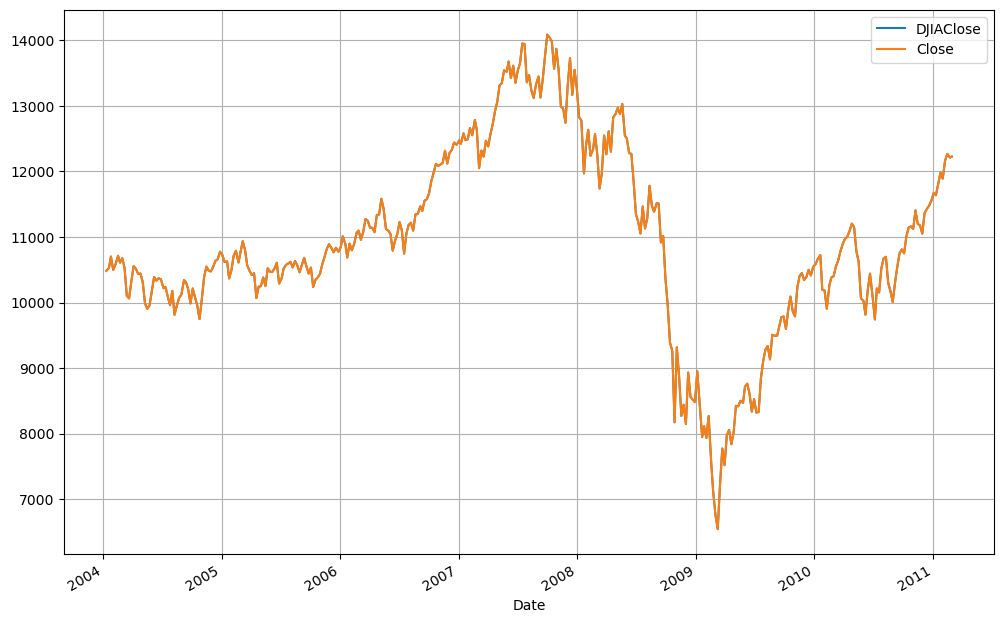

In [14]:
data[['DJIAClose','Close']].plot(figsize=(12,8))
plt.grid("True")

In [15]:
(data['DJIAClose'] - data['Close']).describe()

count    373.000000
mean       0.004218
std        0.047501
min       -0.080078
25%       -0.019805
50%        0.000117
75%        0.029609
max        0.740195
dtype: float64

In [16]:
data[['DJIAClose','Close']].corr()

           DJIAClose  Close
DJIAClose        1.0    1.0
Close            1.0    1.0

In [18]:
from io import StringIO 
with open('trends_report_debt.csv') as f:
    data_section = f.read().split('\n\n')[1]
    trends_data = pd.read_csv(
    StringIO(data_section),
    header = 1, index_col = 'Week',
    converters = {
        'Week': lambda x:pd.to_datetime(x.split(' ')[-1])
    })

    our_debt_trends = trends_data['2004-01-01':'2011-02-28']

In [19]:
our_debt_trends

            debt
Week            
2004-01-10    63
2004-01-17    60
2004-01-24    61
2004-01-31    63
2004-02-07    61
...          ...
2011-01-29    65
2011-02-05    57
2011-02-12    58
2011-02-19    64
2011-02-26    58

[373 rows x 1 columns]

In [20]:
final = pd.merge(data.reset_index(), our_debt_trends,
                left_on = 'GoogleWE', right_on = 'Week',
                suffixes=['_P', '_O'])

In [21]:
final

          Date   GoogleWE    debt_P  DJIAClose         Close  debt_O
0   2004-01-12 2004-01-10  0.210000   10485.18  10485.200195      63
1   2004-01-20 2004-01-17  0.210000   10528.66  10528.700195      60
2   2004-01-26 2004-01-24  0.210000   10702.51  10702.500000      61
3   2004-02-02 2004-01-31  0.213333   10499.18  10499.200195      63
4   2004-02-09 2004-02-07  0.200000   10579.03  10579.000000      61
..         ...        ...       ...        ...           ...     ...
368 2011-01-31 2011-01-29  0.190000   11891.93  11891.900391      65
369 2011-02-07 2011-02-05  0.176667   12161.63  12161.599609      57
370 2011-02-14 2011-02-12  0.173333   12268.19  12268.200195      58
371 2011-02-22 2011-02-19  0.180000   12212.79  12212.799805      64
372 2011-02-28 2011-02-26  0.170000   12226.34  12226.299805      58

[373 rows x 6 columns]

In [22]:
final.set_index('Date', inplace=True)

In [23]:
final

             GoogleWE    debt_P  DJIAClose         Close  debt_O
Date                                                            
2004-01-12 2004-01-10  0.210000   10485.18  10485.200195      63
2004-01-20 2004-01-17  0.210000   10528.66  10528.700195      60
2004-01-26 2004-01-24  0.210000   10702.51  10702.500000      61
2004-02-02 2004-01-31  0.213333   10499.18  10499.200195      63
2004-02-09 2004-02-07  0.200000   10579.03  10579.000000      61
...               ...       ...        ...           ...     ...
2011-01-31 2011-01-29  0.190000   11891.93  11891.900391      65
2011-02-07 2011-02-05  0.176667   12161.63  12161.599609      57
2011-02-14 2011-02-12  0.173333   12268.19  12268.200195      58
2011-02-22 2011-02-19  0.180000   12212.79  12212.799805      64
2011-02-28 2011-02-26  0.170000   12226.34  12226.299805      58

[373 rows x 5 columns]

In [24]:
combined_trends = final[['GoogleWE', 'debt_P','debt_O']].set_index('GoogleWE')

In [25]:
combined_trends.corr()

         debt_P   debt_O
debt_P  1.00000  0.95766
debt_O  0.95766  1.00000

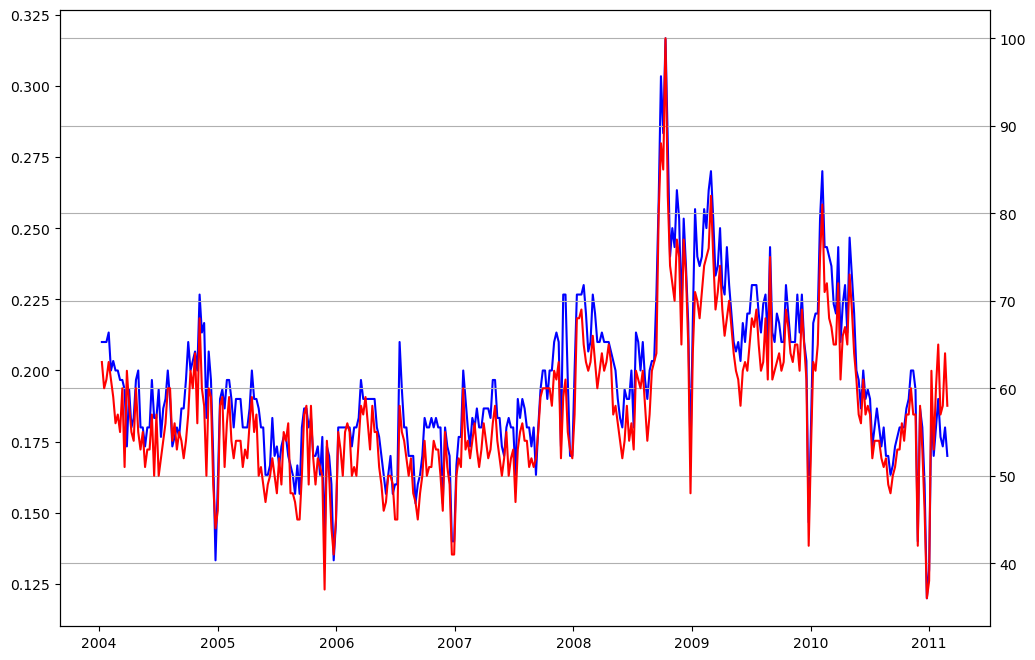

In [26]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(combined_trends.index, combined_trends.debt_P, color='b')
ax2 = ax1.twinx()
ax2.plot(combined_trends.index, combined_trends.debt_O, color='r')
plt.grid(True)
plt.show()

### Generare i segnali

In [27]:
base = final.reset_index().set_index('GoogleWE')

In [28]:
base.drop(['DJIAClose'], inplace=True, axis=1)

In [29]:
base.head()

                 Date    debt_P         Close  debt_O
GoogleWE                                             
2004-01-10 2004-01-12  0.210000  10485.200195      63
2004-01-17 2004-01-20  0.210000  10528.700195      60
2004-01-24 2004-01-26  0.210000  10702.500000      61
2004-01-31 2004-02-02  0.213333  10499.200195      63
2004-02-07 2004-02-09  0.200000  10579.000000      61

In [30]:
base['PMA'] = base['debt_P'].shift(1).rolling(3).mean()
base['OMA'] = base['debt_O'].shift(1).rolling(3).mean()

In [31]:
base.head()

                 Date    debt_P         Close  debt_O       PMA        OMA
GoogleWE                                                                  
2004-01-10 2004-01-12  0.210000  10485.200195      63       NaN        NaN
2004-01-17 2004-01-20  0.210000  10528.700195      60       NaN        NaN
2004-01-24 2004-01-26  0.210000  10702.500000      61       NaN        NaN
2004-01-31 2004-02-02  0.213333  10499.200195      63  0.210000  61.333333
2004-02-07 2004-02-09  0.200000  10579.000000      61  0.211111  61.333333

In [32]:
base['signal0'] = 0
base.loc[base.debt_P > base.PMA, 'signal0'] = -1
base.loc[base.debt_P < base.PMA, 'signal0'] = 1
base['signal1'] = 0
base.loc[base.debt_O > base.OMA, 'signal1'] = -1
base.loc[base.debt_O < base.OMA, 'signal1'] = 1
base[['debt_P', 'PMA', 'signal0', 'debt_O', 'OMA', 'signal1']]


              debt_P       PMA  signal0  debt_O        OMA  signal1
GoogleWE                                                           
2004-01-10  0.210000       NaN        0      63        NaN        0
2004-01-17  0.210000       NaN        0      60        NaN        0
2004-01-24  0.210000       NaN        0      61        NaN        0
2004-01-31  0.213333  0.210000       -1      63  61.333333       -1
2004-02-07  0.200000  0.211111        1      61  61.333333        1
...              ...       ...      ...     ...        ...      ...
2011-01-29  0.190000  0.178889       -1      65  58.333333       -1
2011-02-05  0.176667  0.180000        1      57  59.333333        1
2011-02-12  0.173333  0.182222        1      58  60.666667        1
2011-02-19  0.180000  0.180000        1      64  60.000000       -1
2011-02-26  0.170000  0.176667        1      58  59.666667        1

[373 rows x 6 columns]

 #### Calcolo dei rendimenti della strategia

In [33]:
base['PctChg'] = base.Close.pct_change().shift(-1)
base[['Close', 'PctChg', 'signal0', 'signal1']][:5]

                   Close    PctChg  signal0  signal1
GoogleWE                                            
2004-01-10  10485.200195  0.004149        0        0
2004-01-17  10528.700195  0.016507        0        0
2004-01-24  10702.500000 -0.018996        0        0
2004-01-31  10499.200195  0.007601       -1       -1
2004-02-07  10579.000000  0.012846        1        1

In [34]:
base['ret0'] = base.PctChg * base.signal0
base['ret1'] = base.PctChg * base.signal1
base[['Close', 'PctChg', 'signal0', 'signal1', 'ret0', 'ret1']]
base.head(10)

                 Date    debt_P         Close  debt_O       PMA        OMA  \
GoogleWE                                                                     
2004-01-10 2004-01-12  0.210000  10485.200195      63       NaN        NaN   
2004-01-17 2004-01-20  0.210000  10528.700195      60       NaN        NaN   
2004-01-24 2004-01-26  0.210000  10702.500000      61       NaN        NaN   
2004-01-31 2004-02-02  0.213333  10499.200195      63  0.210000  61.333333   
2004-02-07 2004-02-09  0.200000  10579.000000      61  0.211111  61.333333   
2004-02-14 2004-02-17  0.203333  10714.900391      59  0.207778  61.666667   
2004-02-21 2004-02-23  0.200000  10609.599609      56  0.205555  61.000000   
2004-02-28 2004-03-01  0.200000  10678.099609      57  0.201111  58.666667   
2004-03-06 2004-03-08  0.196667  10529.500000      55  0.201111  57.333333   
2004-03-13 2004-03-15  0.196667  10102.900391      60  0.198889  56.000000   

            signal0  signal1    PctChg      ret0      ret1  
Go

#### Rendimenti cumulati

In [35]:
base['cumret0'] = (1 + base.ret0).cumprod() - 1
base['cumret1'] = (1 + base.ret1).cumprod() - 1
base[['cumret0', 'cumret1']]

             cumret0   cumret1
GoogleWE                      
2004-01-10  0.000000  0.000000
2004-01-17  0.000000  0.000000
2004-01-24  0.000000  0.000000
2004-01-31 -0.007601 -0.007601
2004-02-07  0.005148  0.005148
...              ...       ...
2011-01-29  2.688481  0.846517
2011-02-05  2.720811  0.862703
2011-02-12  2.704009  0.854291
2011-02-19  2.708103  0.852242
2011-02-26       NaN       NaN

[373 rows x 2 columns]

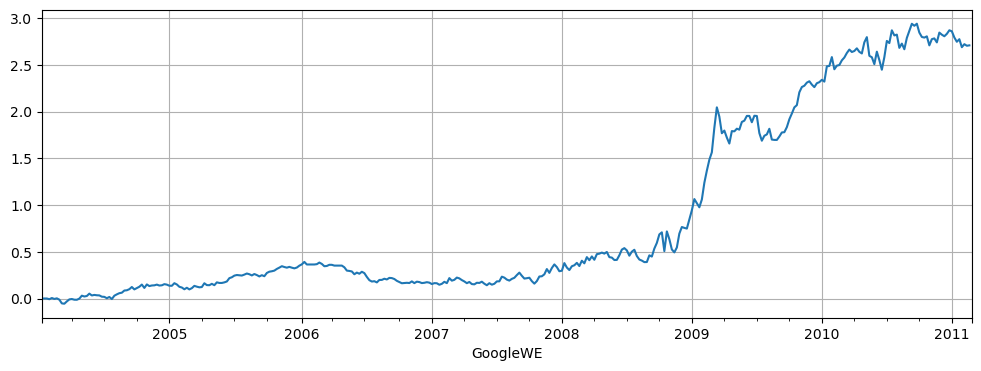

In [36]:
base['cumret0'].plot(figsize=(12,4), grid=True);

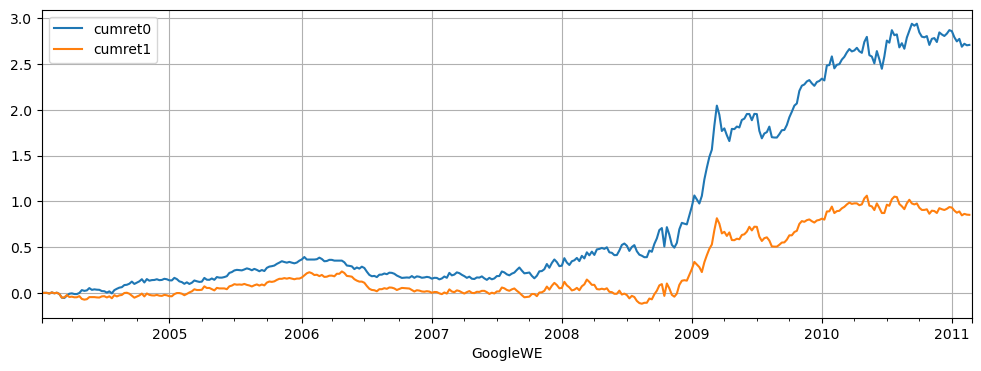

In [38]:
base[['cumret0', 'cumret1']].plot(figsize=(12,4), grid=True);